In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN
from time import time

### Cargar Imagén y Detectar

In [12]:
# Carga imagen (sube archivos en Colab o usa una URL y descárgala)
img = cv2.imread('./imgs/grupo.jpg')  # reemplaza por tu archivo
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

detector = MTCNN()   # puedes ajustar min_face_size
t0 = time()
res = detector.detect_faces(img_rgb)
t1 = time()

print(f"Detected: {len(res)} rostro(s) • tiempo: {(t1 - t0)*1000:.1f} ms")
for r in res:
    print(r['confidence'], r['box'], r['keypoints'].keys())

Exception ignored in: <_io.BufferedReader>
Traceback (most recent call last):
  File "c:\Users\thejo\AppData\Local\Programs\Python\Python313\Lib\site-packages\lz4\frame\__init__.py", line 753, in flush
    self._fp.flush()
ValueError: I/O operation on closed file.
Exception ignored in: <_io.BufferedReader>
Traceback (most recent call last):
  File "c:\Users\thejo\AppData\Local\Programs\Python\Python313\Lib\site-packages\lz4\frame\__init__.py", line 753, in flush
    self._fp.flush()
ValueError: I/O operation on closed file.
Exception ignored in: <_io.BufferedReader>
Traceback (most recent call last):
  File "c:\Users\thejo\AppData\Local\Programs\Python\Python313\Lib\site-packages\lz4\frame\__init__.py", line 753, in flush
    self._fp.flush()
ValueError: I/O operation on closed file.


Detected: 14 rostro(s) • tiempo: 133.0 ms
0.9999996423721313 [86, 75, 36, 47] dict_keys(['nose', 'mouth_right', 'right_eye', 'left_eye', 'mouth_left'])
0.9999855756759644 [458, 90, 36, 47] dict_keys(['nose', 'mouth_right', 'right_eye', 'left_eye', 'mouth_left'])
0.9999366998672485 [169, 112, 41, 59] dict_keys(['nose', 'mouth_right', 'right_eye', 'left_eye', 'mouth_left'])
0.9999362230300903 [200, 42, 38, 50] dict_keys(['nose', 'mouth_right', 'right_eye', 'left_eye', 'mouth_left'])
0.9998964071273804 [389, 116, 41, 54] dict_keys(['nose', 'mouth_right', 'right_eye', 'left_eye', 'mouth_left'])
0.999455988407135 [335, 103, 34, 46] dict_keys(['nose', 'mouth_right', 'right_eye', 'left_eye', 'mouth_left'])
0.9991171956062317 [45, 123, 40, 53] dict_keys(['nose', 'mouth_right', 'right_eye', 'left_eye', 'mouth_left'])
0.9990220069885254 [259, 85, 48, 64] dict_keys(['nose', 'mouth_right', 'right_eye', 'left_eye', 'mouth_left'])
0.998923122882843 [145, 174, 40, 57] dict_keys(['nose', 'mouth_right'

### Dibujar cajas y landmarks

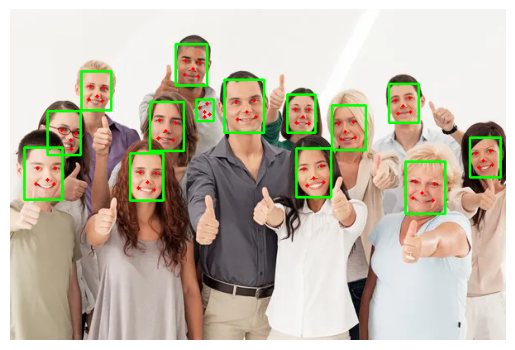

In [13]:
vis = img_rgb.copy()
for r in res:
    x, y, w, h = r['box']
    cv2.rectangle(vis, (x,y), (x+w, y+h), (0,255,0), 2)
    for name, (px,py) in r['keypoints'].items():
        cv2.circle(vis, (px,py), 2, (255,0,0), -1)
plt.imshow(vis)
plt.axis('off')
plt.show()

### Umbrales y NMS (entiende falsos postivios)

In [14]:
detector = MTCNN()  # su NMS interno filtra solapes
# Prueba filtrado por confianza mínima
thr = 0.90
filtrados = [r for r in res if r['confidence'] >= thr]
print(f"Con thr={thr} quedan {len(filtrados)} rostros")

Exception ignored in: <_io.BufferedReader>
Traceback (most recent call last):
  File "c:\Users\thejo\AppData\Local\Programs\Python\Python313\Lib\site-packages\lz4\frame\__init__.py", line 753, in flush
    self._fp.flush()
ValueError: I/O operation on closed file.
Exception ignored in: <_io.BufferedReader>
Traceback (most recent call last):
  File "c:\Users\thejo\AppData\Local\Programs\Python\Python313\Lib\site-packages\lz4\frame\__init__.py", line 753, in flush
    self._fp.flush()
ValueError: I/O operation on closed file.
Exception ignored in: <_io.BufferedReader>
Traceback (most recent call last):
  File "c:\Users\thejo\AppData\Local\Programs\Python\Python313\Lib\site-packages\lz4\frame\__init__.py", line 753, in flush
    self._fp.flush()
ValueError: I/O operation on closed file.


Con thr=0.9 quedan 14 rostros


### IoU simple (evaluación rápida)

In [15]:
def iou(a, b):
    # a,b en formato [x,y,w,h]
    ax1, ay1, aw, ah = a; ax2, ay2 = ax1+aw, ay1+ah
    bx1, by1, bw, bh = b; bx2, by2 = bx1+bw, by1+bh
    ix1, iy1 = max(ax1,bx1), max(ay1,by1)
    ix2, iy2 = min(ax2,bx2), min(ay2,by2)
    inter = max(0, ix2-ix1)*max(0, iy2-iy1)
    union = aw*ah + bw*bh - inter
    return inter/union if union>0 else 0.0

# Si tienes una caja "ground truth" gt_box, compara:
# print(iou(res[0]['box'], gt_box))